# DSC 550
# Week 5
# Project Milestone 1
# Author: Muthukumar Kadhirvel
# 7/8/2022

I have always wondered about how companies price various used products like cars/laptops/mobile phones etc. as there is no clear way to arrive at the price compared to new products. With new products you have complete control of the various components that go into building the product and so we can add the requisite profit margin and price the same. But with used products there are a lot of unknowns and so this seems like a wonderful area to practice our data mining skillset.

In this project we will work with a dataset that has prices of used cars from India. The dataset can be downloaded from the below URL.
https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?select=train-data.csv. 

Using the properties of various used cars like Location/Year/Driven Kilometers/Fuel Type/Transmission Type/Owner Type/Mileage/Engine power/Seats/Price etc. we can come with a model that can predict the price of any car that can come into the system. This would be useful for any business that deals with used cars like a car sales company/website that lists the used cars from various companies for sale.

We will first clean and transform the data as required as there are some categorical variables that cannot be used in data mining and hence can be dropped. Then we can perform Exploratory Data Analysis (EDA) and prepare the data for modeling. Once the data is prepared we can split the data into training dataset and test dataset and then build the model on the training dataset. Once the model is ready we can use it to apply prediction on the test dataset and evaluate the same for accuracy.

Install necessary packages and read used_cars file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
used_cars_df = pd.read_csv('used_cars.csv')
print(used_cars_df.head())
print(used_cars_df.shape)
# Name/Location/New_Price can be removed as they are variables with no context for our project
used_cars_df.drop(['Unnamed: 0','Name','Location','New_Price'],axis=1, inplace=True)
print(used_cars_df.head())
print(used_cars_df.shape)

   Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN

We can see there are 6019 rows and 10 columns and there is a mix of numerical and categorical data and the target of the model will be Price.

Prep the data

In [2]:
# Explore properties of data
print(used_cars_df.dtypes)
print(used_cars_df.describe())
print(used_cars_df.describe(include = ['O']))
# Fuel_Type/Transmission/Owner_Type/Mileage/Engine/Power columns are stored as object

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object
              Year  Kilometers_Driven        Seats        Price
count  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   2013.358199       5.873838e+04     5.278735     9.479468
std       3.269742       9.126884e+04     0.808840    11.187917
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000
       Fuel_Type Transmission Owner_Type    Mileage   Engine   Power
count       6019         6019       6019       6017

Create Histograms for numerical data of Year & Seats

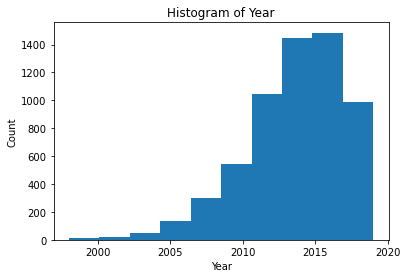

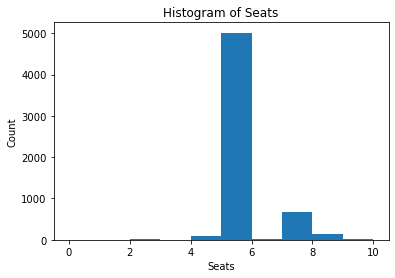

In [3]:
plt.title("Histogram of Year")
plt.hist(used_cars_df.Year.dropna())
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()
plt.title("Histogram of Seats")
plt.hist(used_cars_df.Seats.dropna())
plt.xlabel("Seats")
plt.ylabel("Count")
plt.show()

Create Barcharts for categorical data of Fuel_Type & Transmission & Owner_Type

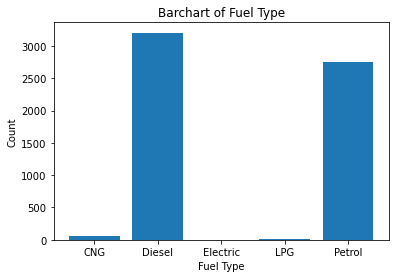

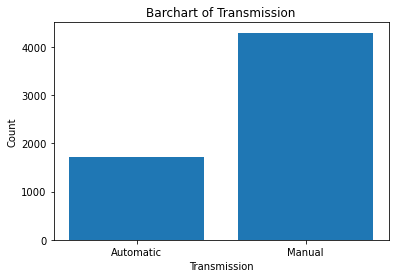

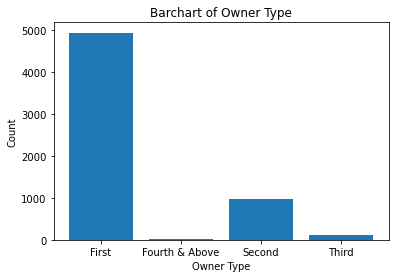

In [4]:
X_Fuel = used_cars_df.groupby('Fuel_Type').size().reset_index(name='Counts')['Fuel_Type']
Y_Fuel = used_cars_df.groupby('Fuel_Type').size().reset_index(name='Counts')['Counts']
plt.title("Barchart of Fuel Type")
plt.bar(X_Fuel, Y_Fuel)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()
X_Transmission = used_cars_df.groupby('Transmission').size().reset_index(name='Counts')['Transmission']
Y_Transmission = used_cars_df.groupby('Transmission').size().reset_index(name='Counts')['Counts']
plt.title("Barchart of Transmission")
plt.bar(X_Transmission, Y_Transmission)
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()
X_Owner = used_cars_df.groupby('Owner_Type').size().reset_index(name='Counts')['Owner_Type']
Y_Owner = used_cars_df.groupby('Owner_Type').size().reset_index(name='Counts')['Counts']
plt.title("Barchart of Owner Type")
plt.bar(X_Owner, Y_Owner)
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.show()

As we can see from the Historgrams we have many cars from the past 10 years and Ba5 seaters which is expected                   
As we can see from the Barcharts we can see we have more Diesel & Petrol cars/Manual Transmission/First Owners                 
Using the above graphs we can decide on the important features that we can use for data modeling

# DSC 550
# Week 7
# Project Milestone 2
# Author: Muthukumar Kadhirvel
# 7/23/2022

Drop any features that are not useful for your model building and explain why they are not useful.

In [5]:
import pandas as pd
import numpy as np
used_cars_df = pd.read_csv('used_cars.csv')
# Explore properties of data
print(used_cars_df.dtypes)
print(used_cars_df.describe(include = ['O']))
# Fuel_Type/Transmission/Owner_Type are pure categorical variables
# Mileage/Engine/Power needs to be converted to numerical variables
# Unnamed: 0 is a dummy index variable and hence can be dropped
# Name can be removed as it is a categorical variable with a lot of non unique values
# Location is a categorical variable with more non unique values and can be removed
# New_Price can be removed as it is a categorical variable with a lot of non unique values
used_cars_df.drop(['Unnamed: 0','Name','Location','New_Price'],axis=1, inplace=True)
print(used_cars_df.head())

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object
                          Name Location Fuel_Type Transmission Owner_Type  \
count                     6019     6019      6019         6019       6019   
unique                    1876       11         5            2          4   
top     Mahindra XUV500 W8 2WD   Mumbai    Diesel       Manual      First   
freq                        49      790      3205         4299       4929   

          Mileage   Engine   Power   New_Price  
count        6017     5983    5983         824  
unique        442      146     372         540  
top     18.9 kmpl  1197 CC  74 bhp  95.13 Lakh 

Transform features if necessary.

In [6]:
# Mileage - All entries have kmpl or km/kg at the end which we can remove but convert km/kg to kmpl
Mileage= []
for i in used_cars_df.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-5]
        i = float(i)*1.40
        Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-4]
        Mileage.append(float(i))
    else:
        Mileage.append(np.nan)
used_cars_df['Mileage'] = Mileage
# Engine - All entries have CC at the end which we can remove
Engine= []
for i in used_cars_df.Engine:
    if str(i).endswith('CC'):
        i = i[:-2]
        Engine.append(float(i))
    else:
        Engine.append(np.nan)
used_cars_df['Engine'] = Engine
# Power - All entries have bhp at the end which we can remove
# Power - There are some null bhp values that has to be converted to nan first
used_cars_df['Power'] = used_cars_df['Power'].replace('null bhp', np.nan)
Power = []
for i in used_cars_df.Power:
    if str(i).endswith('bhp'):
        i = i[:-3]
        Power.append(float(i))
    else:
        Power.append(np.nan)
used_cars_df['Power'] = Power
print(used_cars_df.head())

   Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0  2010              72000       CNG       Manual      First    37.24   998.0   
1  2015              41000    Diesel       Manual      First    19.67  1582.0   
2  2011              46000    Petrol       Manual      First    18.20  1199.0   
3  2012              87000    Diesel       Manual      First    20.77  1248.0   
4  2013              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  Price  
0   58.16    5.0   1.75  
1  126.20    5.0  12.50  
2   88.70    5.0   4.50  
3   88.76    7.0   6.00  
4  140.80    5.0  17.74  


Deal with missing data (do not just drop rows or columns without justifying this).

In [7]:
# Convert Mileage/Engine/Power to float type
used_cars_df['Mileage'] = used_cars_df['Mileage'].astype(float)
used_cars_df['Engine'] = used_cars_df['Engine'].astype(float)
used_cars_df['Power'] = used_cars_df['Power'].astype(float)
# Fill missing data with median values for Mileage/Engine/Power/Seats
used_cars_df['Mileage'].fillna(value=pd.to_numeric(used_cars_df['Mileage']).median(), inplace=True)
used_cars_df['Engine'].fillna(value=pd.to_numeric(used_cars_df['Engine']).median(), inplace=True)
used_cars_df['Power'].fillna(value=pd.to_numeric(used_cars_df['Power']).median(), inplace=True)
used_cars_df['Seats'].fillna(value=pd.to_numeric(used_cars_df['Seats']).median(), inplace=True)
# Find if any columns still have null values
print(used_cars_df.isna().any())
print(used_cars_df.head())

Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage              False
Engine               False
Power                False
Seats                False
Price                False
dtype: bool
   Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0  2010              72000       CNG       Manual      First    37.24   998.0   
1  2015              41000    Diesel       Manual      First    19.67  1582.0   
2  2011              46000    Petrol       Manual      First    18.20  1199.0   
3  2012              87000    Diesel       Manual      First    20.77  1248.0   
4  2013              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  Price  
0   58.16    5.0   1.75  
1  126.20    5.0  12.50  
2   88.70    5.0   4.50  
3   88.76    7.0   6.00  
4  140.80    5.0  17.74  


Create dummy variables if necessary.

In [8]:
# Check variable types and value of each categorical variable
print(used_cars_df.dtypes)
print(used_cars_df['Fuel_Type'].value_counts())
print(used_cars_df['Transmission'].value_counts())
print(used_cars_df['Owner_Type'].value_counts())
# Create dummy variables for Fuel_Type with drop_first so that we just have 5 columns of 4
Fuel_Type_Temp = pd.get_dummies(used_cars_df[['Fuel_Type']],drop_first=True)
# Create dummy variables for Transmission with drop_first so that we just have 1 columns instead of 2
Transmission_Temp = pd.get_dummies(used_cars_df[['Transmission']],drop_first=True)
# Covert Owner_Type to have numerical label encoding
used_cars_df['Owner_Type'].replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
# Concatenate new dummy variables into dataframe and drop original columns
used_cars_df = pd.concat([used_cars_df,Fuel_Type_Temp,Transmission_Temp],axis=1)
used_cars_df.drop(['Fuel_Type','Transmission'],axis=1,inplace=True)
print(used_cars_df.head())
print(used_cars_df.describe())

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64
First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64
   Year  Kilometers_Driven  Owner_Type  Mileage  Engine   Power  Seats  Price  \
0  2010              72000           1    37.24   998.0   58.16    5.0   1.75   
1  2015              41000           1    19.67  1582.0  126.20    5.0  12.50   
2  2011              46000           1    18.20  1199.0   88.70    5.0   4.50   
3  2012              87000           1    20.77  1248.0   88.76  

# DSC 550
# Week 5
# Project Milestone 3
# Author: Muthukumar Kadhirvel
# 8/5/2022

Split the Used Cars data into training (80%) and test (20%) where the Price column is the target.

In [9]:
from sklearn.model_selection import train_test_split
# Create features series with all columns other than Price
features = used_cars_df.drop(['Price'], axis = 1)
# Create target series with Price
target = used_cars_df.Price
# Create training and test data with test size being 20%
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)
print('Size of training data is',len(features_train))
print('Size of test data is',len(features_test))

Size of training data is 4815
Size of test data is 1204


We will first start off with Linear Regression and find the R2 score on the training and test data. We are using R2 score instead of accuracy as accuracy is used as a metric for classification problems and R2 score is used as an evaluation metric for regression problems.

In [10]:
# Use LinearRegression on the training data
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
# Fit Linear Regression on the test data
linear.fit(features_train, target_train)
# Calculate R2 value for Linear Regression on training and test data
test_predicted = linear.predict(features_test)
print('R2 score with Linear Regression on Training data is',linear.score(features_train, target_train))
print('R2 score with Linear Regression on Test data is',linear.score(features_test, target_test))

R2 score with Linear Regression on Training data is 0.6826158287838031
R2 score with Linear Regression on Test data is 0.7384677115622555


Since the R2 score is low we will try a new model with Standard Scaler and PCA and reduce the number of dimensions

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardize the feature matrix on training data
features_train_matrix = StandardScaler().fit_transform(features_train)
# Fit and transform a PCA on training data that will retain 90% of variance
pca = PCA(n_components=0.90, whiten=True)
features_train_pca = pca.fit_transform(features_train_matrix)
# PCA transformed training matrix
print("Original number of features:", features_train.shape[1])
print("Reduced number of features:", features_train_pca.shape[1])
# Standardize the feature matrix on test data
features_test_matrix = StandardScaler().fit_transform(features_test)
# Transform a PCA on test data that will retain 90% of variance
features_test_pca = pca.transform(features_test_matrix)
# Use LinearRegression on the PCA transformed train data
linear_pca = LinearRegression()
linear_pca.fit(features_train_pca, target_train)
# Calculate R2 value for PCA transformed training data by applying Linear Regression on training and test data
test_predicted_pca = linear_pca.predict(features_test_pca)
print('R2 score with Linear Regression on PCA Training data is',linear_pca.score(features_train_pca, target_train))
print('R2 score with Linear Regression on PCA Test data is',linear_pca.score(features_test_pca, target_test))

Original number of features: 12
Reduced number of features: 8
R2 score with Linear Regression on PCA Training data is 0.6520230826467918
R2 score with Linear Regression on PCA Test data is 0.690167072911122


Since the R2 score is lower than Linear Regression we will try Random Forest Regression model

In [12]:
# Use RandomForestRegressor on the training data
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Fit Random Forest Regression on the test data
forest.fit(features_train, target_train)
# Calculate R2 value for Random Forest Regression on training and test data
test_predicted_forest = forest.predict(features_test)
print('R2 score with Random Forest Regression on Training data is',forest.score(features_train, target_train))
print('R2 score with Random Forest Regression on Test data is',forest.score(features_test, target_test))

R2 score with Random Forest Regression on Training data is 0.9820510047771309
R2 score with Random Forest Regression on Test data is 0.9005597516648428


With Linear Regression we got 68% R2 score on training data and 74% R2 score on test data - This is the base model and the R2 score is very low for us to use it properly to model future incoming data.                                                        With PCA transformed Linear Regression we got 65% R2 score on training data and 69% R2 score on test data - The R2 score of the model reduced as typically PCA is used when we have a lot of features but in our case we just had 12 and so PCA did not yield a favorable R2 score compared to Linear Regression but we were able to reduce the features from 12 to 8.                            With Random Forests Regression we got 98% R2 score on training data and 90% R2 score on test data - This likely means that we have nonlinear relationships in our data. This is a great value and we can continue using this model for our data set to effectively calculate the price of any used car that can come in.                                                                Since this is not a classification problem we cannot use accuracy as a metric. So we are going to use R2 score metric which makes a lot more sense in these type of problems.